The analysis of discharge

1. Compare values with old data
2. Calculate how much data was added for each basin
3. Find new train/val/test ranges
4. Calculate how much data is available for each period for each basin
5. Filter out basins by data availability

1.

In [1]:
import pandas as pd
import os 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [73]:
file1 = pd.read_csv('streamflow_new/11011.csv')
file1

date           0
discharge    387
dtype: int64

In [74]:
file2 = pd.read_csv("streamflow_default_units/11011.csv")
file2


date         0
discharge    0
dtype: int64

In [67]:
print(file1['discharge'].describe())
print()
print(file2['discharge'].describe())

count    5092.000000
mean       20.362954
std        19.855776
min         1.170000
25%        10.100000
50%        17.300000
75%        25.500000
max       787.000000
Name: discharge, dtype: float64

count    3550.000000
mean       18.434958
std        11.556836
min         1.170000
25%        10.200000
50%        16.600000
75%        24.300000
max        95.100000
Name: discharge, dtype: float64


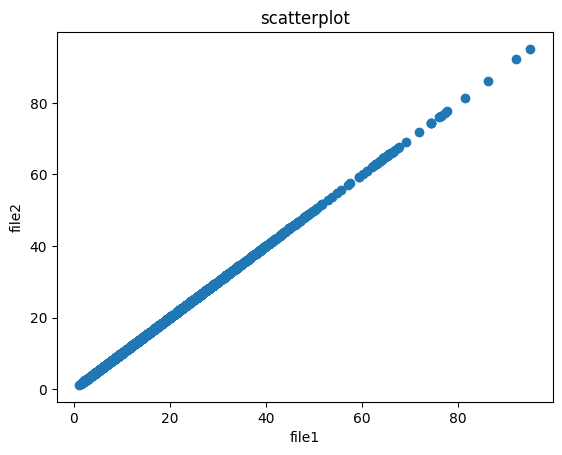

In [68]:
merged = file1.merge(file2, on=['date'], how='outer')
merged

plt.scatter(merged['discharge_x'], merged['discharge_y'])
plt.xlabel('file1')
plt.ylabel('file2')
plt.title('scatterplot')
plt.show()

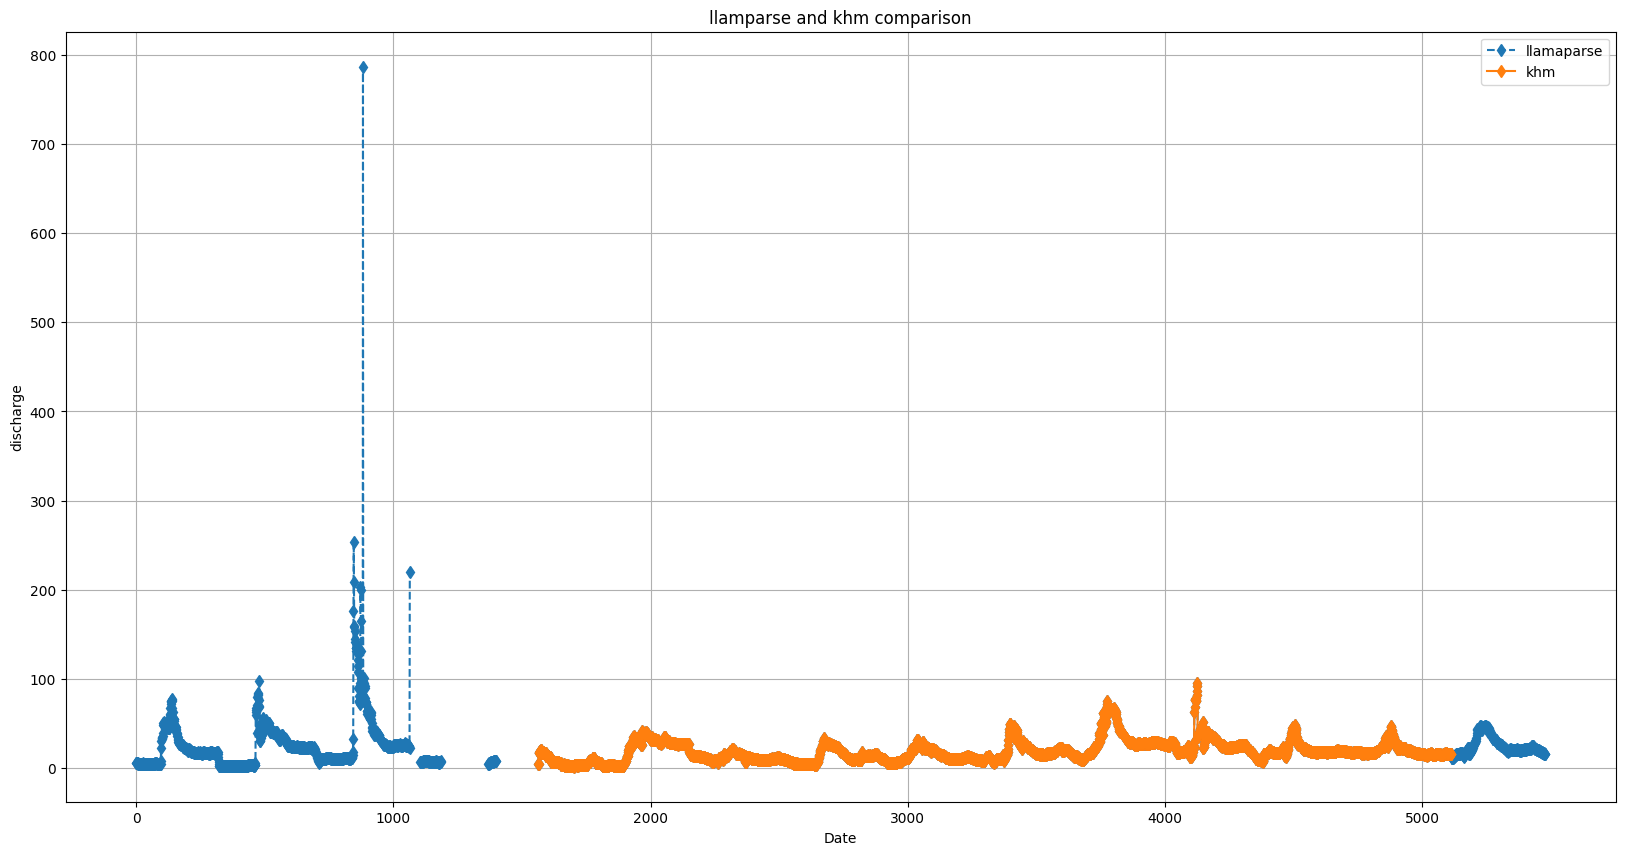

In [69]:
plt.figure(figsize=(20, 10))
plt.plot(merged['discharge_x'], label='llamaparse', linestyle='--', marker='d')

plt.plot(merged['discharge_y'], label='khm', linestyle='-', marker='d')

plt.title('llamparse and khm comparison')
plt.xlabel('Date')
plt.ylabel('discharge')
plt.legend()
plt.grid(True)
plt.show()

In [70]:
correlation = merged['discharge_x'].corr(merged['discharge_y'])
print(f"Correlation: {correlation}")

Correlation: 0.9999999999999999


In [71]:
df = merged[merged['discharge_x'] != merged['discharge_y']]
df[df['date'] <= '2021-12-31']

,date,discharge_x,discharge_y
0,2008-01-01,5.31,NaN
1,2008-01-02,5.22,NaN
2,2008-01-03,5.14,NaN
3,2008-01-04,5.06,NaN
4,2008-01-05,4.98,NaN
...,...,...,...
1559,2012-04-08,NaN,NaN
1560,2012-04-09,NaN,NaN
1561,2012-04-10,NaN,NaN
1562,2012-04-11,NaN,NaN
